<a href="https://colab.research.google.com/github/Gowtham843/YouTube-Comment-Sentiment-Analysis-using-NLP-and-Machine-Learning/blob/main/preprocessing_%26_EDA_youtube_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv")
df.head()
# comments category
# 1 is postive
# 0 is neutral
# -1 is negative

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
df.shape

(37249, 2)

In [5]:
df.sample()['clean_comment'].values

array(['because when they think most indian people like the way get very upset about this identity but that just because when they think most indian people like the way get very upset about this identity but that just because when they think most indian people like the way get very upset about this identity but that just because when they think most indian people like the way get very upset about this identity but that just because when they think most indian'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [7]:
df.isnull().sum()

,0
clean_comment,100
category,0


In [8]:
# how does the NAN comment looks
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [9]:
# on which category the value is more
df[df['clean_comment'].isna()]['category'].value_counts()

,count
category,
0,100


In [10]:
# As it is neutral category and NAN comment is waste
df.dropna(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(350)

In [12]:
df[df.duplicated()]['category'].value_counts()

,count
category,
0,264
1,59
-1,27


In [13]:
# As duplicates can be removed
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
# The are some new line in the dataset
df[(df['clean_comment'].str.strip()=="")]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [16]:
# ~ means not, we can use df[(df['clean_comment'].str.strip()!="")] too, both are same
df=df[~(df['clean_comment'].str.strip()=="")]

In [17]:
# checked all types of space like (. , : \n " ")
df[(df['clean_comment'].str.strip()=="")]

,clean_comment,category


In [18]:
# converting text to lower case
df['clean_comment']=df['clean_comment'].str.lower()

In [19]:
# Converted to lower
df['clean_comment'].sample(3).values

array(['which satellite did modiji take out all channels have now disappeared surgical strike against bad news ',
       'the twitter war just began yesterday wonder what did wrong deserve these people ',
       'why all mainstream comedy all dominated randians and chutis '],
      dtype=object)

In [20]:
# we can see space at starting and ending of the text
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))].values

array([[' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches ',
        1],
       ['buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has made similar claims such rich man gett

In [21]:
# removing the space
df['clean_comment']=df['clean_comment'].apply(lambda x: x.strip())

In [22]:
# verifying  the transformation by checking for any remaining trailing whitespace
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))].sum()

,0
clean_comment,0
category,0


In [23]:
# identify the comments as an URL
url_pattern=r'http[s]?://\S+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern,regex=True)]


In [24]:
# i am able to see Chinese alphabets also
df[df['clean_comment'].str.contains('\n')].value_counts()

,,count
clean_comment,category,
120 amraam\nsee for yourself this particular variant cannot used,1,1
1abp1fhuaq\nformer india spy chief making some very good points,1,1
1ppr\nvance mcdonald martellus bennet,0,1
2013 loss 6230 2014 loss 1724 2015 profit 728 revenues 50k\nmar turnover,0,1
5lmextbwqga\nprotest march jnu solidarity march from mandi house jantar mantar jnu,0,1
...,...,...
्ा् ी ाी े ो ेी ाी े।\nे ी,0,1
’ understanding what you’ saying india invaded bangladesh\nafaik bangladesh declared independence and india fought alongside bangladesh against pakistan bengal and india fought pakistan western front well,0,1
单打苍井空 2016 获悉后，警方抵达现场，\n副督察迪利普拿出2000卢比。消息进一步传开，当地一位政客也过来拿出1万卢比给这家人。，这家人坚持要求取出自己的钱。 这么好的群众，莫迪到底咋想的？ 底层群众真能忍。,0,1


In [25]:
# remove the \n
df['clean_comment']=df['clean_comment'].apply(lambda x: x.replace('\n',' '))


# EDA

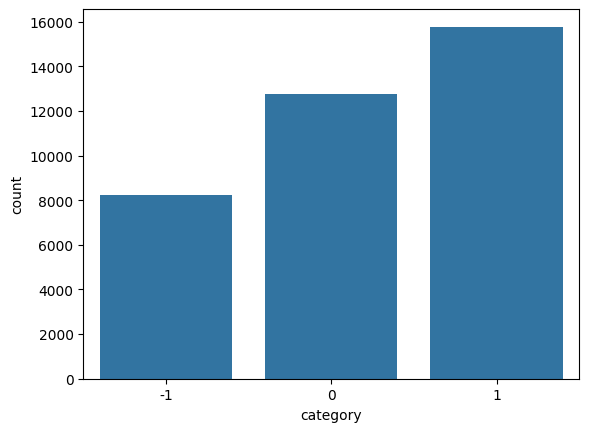

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


# distribution of classes
sns.countplot(df,x="category")
plt.show()


In [27]:
# in percentage of distribution
df['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1,42.86
0,34.71
-1,22.42


In [28]:
# adding new column word_count
df['word_count']=df['clean_comment'].apply(lambda x: len(x.split()))

In [29]:
df

,clean_comment,category,word_count
0,family mormon have never tried explain them th...,1,39
1,buddhism has very much lot compatible with chr...,1,196
2,seriously don say thing first all they won get...,-1,86
3,what you have learned yours and only yours wha...,0,29
4,for your own benefit you may want read living ...,1,112
...,...,...,...
37244,jesus,0,1
37245,kya bhai pure saal chutiya banaya modi aur jab...,1,19
37246,downvote karna tha par upvote hogaya,0,6
37247,haha nice,1,2


In [30]:
df['word_count'].describe()

,word_count
count,36793.000000
mean,29.667464
std,56.790738
min,1.000000
25%,6.000000
50%,13.000000
75%,30.000000
max,1307.000000


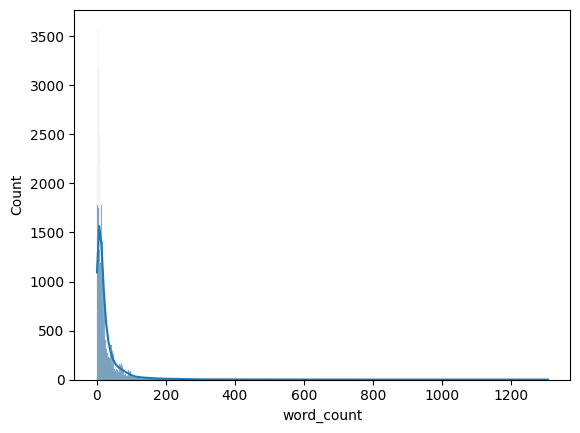

In [31]:
sns.histplot(df['word_count'],kde=True)
plt.show()

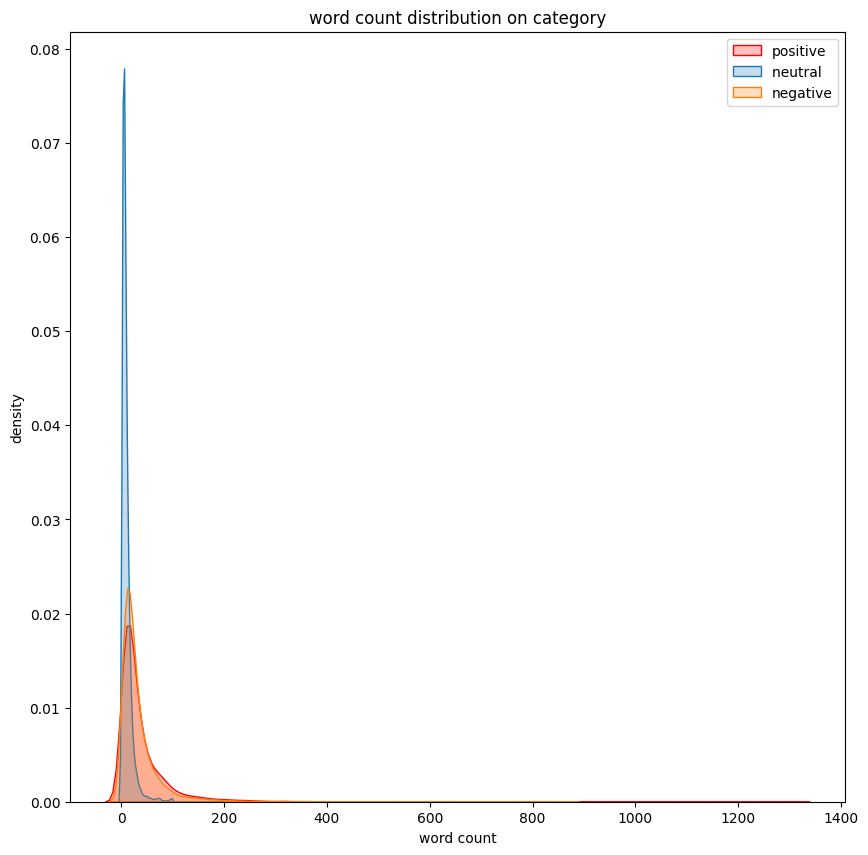

In [32]:
# create the figure
plt.figure(figsize=(10,10))

# plot of KDE 1
sns.kdeplot(df[df['category']==1]['word_count'],label='positive',fill=True,color="red")

# #plot of kde 0
sns.kdeplot(df[df['category']==0]['word_count'],label='neutral ',fill=True)

# # plot of kde -1
sns.kdeplot(df[df['category']==-1]['word_count'],label='negative',fill=True)

plt.title("word count distribution on category")
plt.xlabel("word count")
plt.ylabel("density")
plt.legend()
plt.show()



/tmp/ipython-input-406896.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


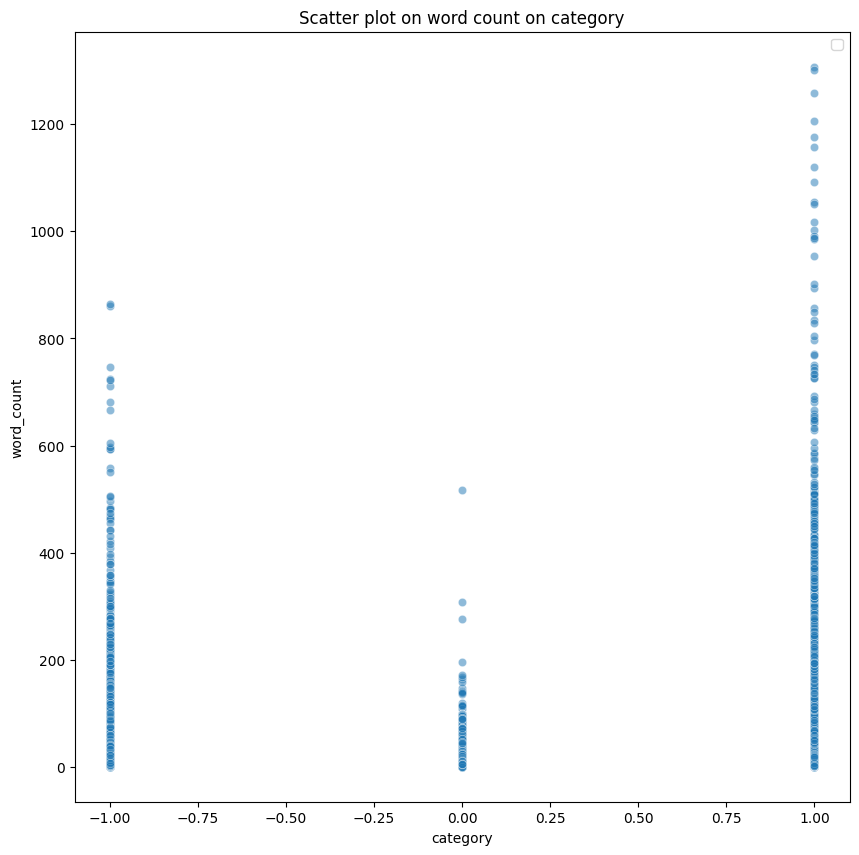

In [33]:
# create the figure
plt.figure(figsize=(10,10))

# sctter plot
sns.scatterplot(data=df,x="category",y="word_count",alpha=0.5)

plt.title("Scatter plot on word count on category")
plt.xlabel("category")
plt.ylabel("word_count")
plt.legend()
plt.show()



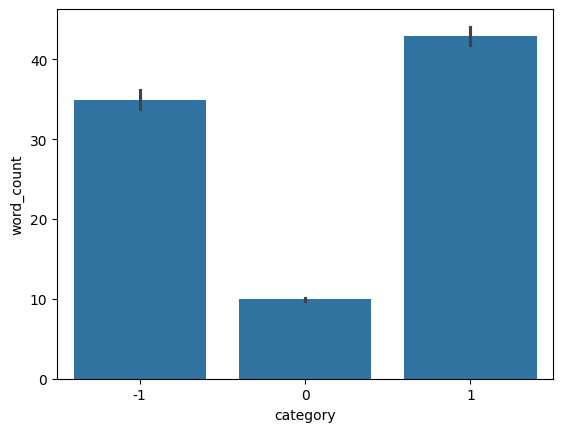

In [34]:
sns.barplot(df,x="category",y="word_count")
plt.show()

In [35]:
!pip install nltk

In [36]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['num_stop_words']=df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
df.sample(10)

,clean_comment,category,word_count,num_stop_words
26995,thought modi was good,1,4,1
35479,sorry but would trust educated economist over ...,-1,8,2
17701,bhenchod dhoni should bat for the next odis,0,8,3
23447,old,1,1,0
34402,when did freya ask mimir about the wings haven...,0,16,5
30138,jinnah foresaw from mile away look this way ea...,-1,60,20
4490,don worry guys not happening many cities like ...,1,57,17
13233,why are these youth leaders are not really mod...,-1,17,8
26167,all sudden feel less inclined farm for her lol,1,9,3
29787,modi should say maa kasam good enough for,1,8,2


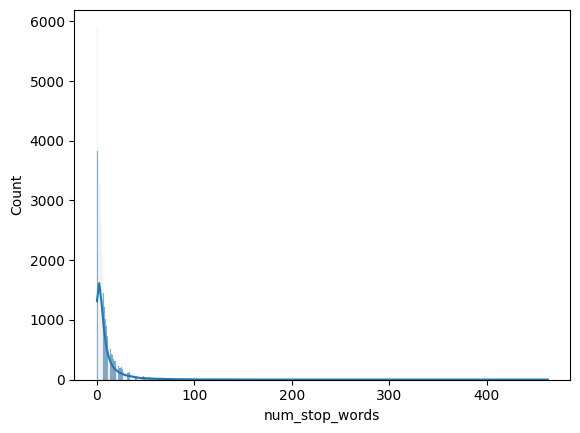

In [38]:
# number of distribution plot for num_stop_words
sns.histplot(df['num_stop_words'],kde=True)
plt.show()

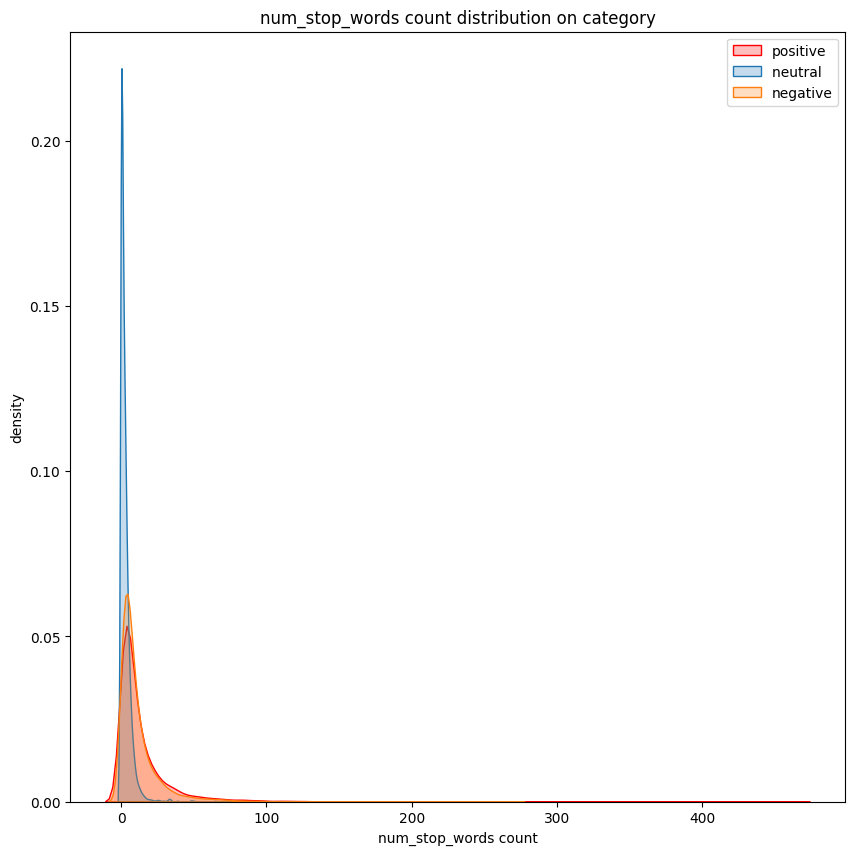

In [39]:
# create the figure
plt.figure(figsize=(10,10))

# plot of KDE 1
sns.kdeplot(df[df['category']==1]['num_stop_words'],label='positive',fill=True,color="red")

# #plot of kde 0
sns.kdeplot(df[df['category']==0]['num_stop_words'],label='neutral ',fill=True)

# # plot of kde -1
sns.kdeplot(df[df['category']==-1]['num_stop_words'],label='negative',fill=True)

plt.title("num_stop_words count distribution on category")
plt.xlabel("num_stop_words count")
plt.ylabel("density")
plt.legend()
plt.show()



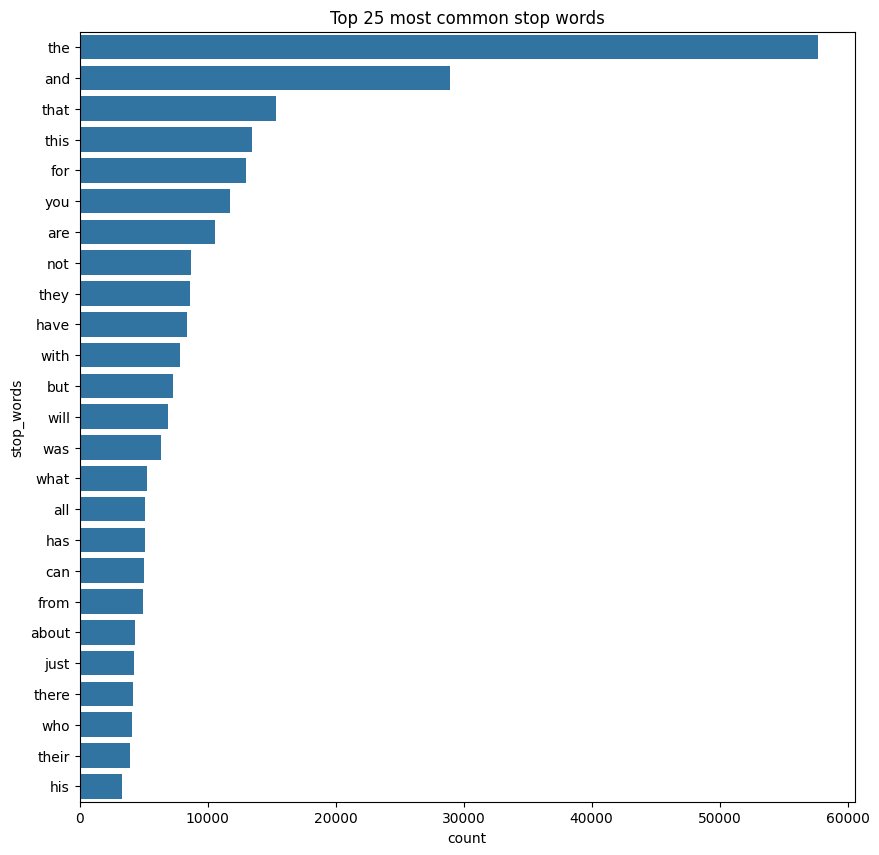

In [40]:
from collections import Counter

# getting all the stop words in the data
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# picking most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# common stop words to dataframe
top_25_df = pd.DataFrame(most_common_stop_words,columns=['stop_words','count'])

# create the barplot for top 25
plt.figure(figsize=(10,10))
sns.barplot(data=top_25_df,y="stop_words",x="count")
plt.title("Top 25 most common stop words")
plt.show()



In [41]:
df['num_chars']=df['clean_comment'].apply(len)

df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars
34834,iamverysmart iamveryfunny niceguy what actually,0,5,1,47
21545,norse mythology loki the father the world serp...,0,16,4,93
19345,and then what make statue your veer savarkar t...,0,9,5,50
20433,ahem jallikattu ahem,0,3,0,20
27617,even less popular opinion expensive headphones...,-1,18,3,123


In [42]:
df['num_chars'].describe()

,num_chars
count,36793.000000
mean,181.852798
std,359.702163
min,1.000000
25%,38.000000
50%,80.000000
75%,184.000000
max,8664.000000


In [43]:
# all comments into one large string
all_text =" ".join(df['clean_comment'])
# count the frequency  of each character
char_freq=Counter(all_text)

# convert to df
char_freq_df=pd.DataFrame(char_freq.items(),columns=['char','count']).sort_values(by='count',ascending=False)
char_freq_df.tail()




,char,count
1345,唯,1
1346,统,1
1330,段,1
1331,她,1
1332,谁,1


In [44]:
# hmm Chinese words 😅
char_freq_df.tail(20)

,char,count
1376,т,1
1299,角,1
1300,衰,1
1350,ూ,1
1373,ണ,1
1374,р,1
1375,ч,1
1337,毫,1
1338,违,1
1339,逍,1


In [45]:
import string
# create number of punctuation in an comment
df["num_punctuations"]=df['clean_comment'].apply(lambda x: len([char for char in x if char in string.punctuation]))



In [46]:
# no punctuation only
df.sample(10)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuations
14078,government corruption always grave threat demo...,0,8,1,61,0
3048,wow prithviraj chauhan might lose that huge ed...,1,14,1,86,0
17617,dhoni walking down the pitch every ball the on...,-1,18,7,105,0
26523,since can’ read doesn’ see the value,0,7,1,36,0
15550,things which affect directly the upa era was l...,1,14,5,76,0
25360,dude don want live place where bjp exists man ...,1,15,4,81,0
2465,ideally affordable health care should human ri...,1,87,27,576,0
12582,good bye,1,2,0,8,0
14640,these violent acts are condemnable indeed but ...,1,79,33,467,0
34666,ooo你好 2016 这tm真的是被卖了还帮着数钱,0,3,0,25,0


In [47]:
from sklearn.feature_extraction.text import CountVectorizer

# create a function to extract the top 25 bigrams
def get_top_25_bigrams(corpus,n=None):
  vec=CountVectorizer(ngram_range=(2,2),stop_words="english").fit(corpus)
  bag_of_words=vec.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)
  return words_freq[:n]

top_25_bigrams = get_top_25_bigrams(df['clean_comment'],25)

# convert DF
top_25_bigrams_df=pd.DataFrame(top_25_bigrams,columns=['bigram','count'])


/tmp/ipython-input-3613382863.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df,x='count',y='bigram', palette='magma')


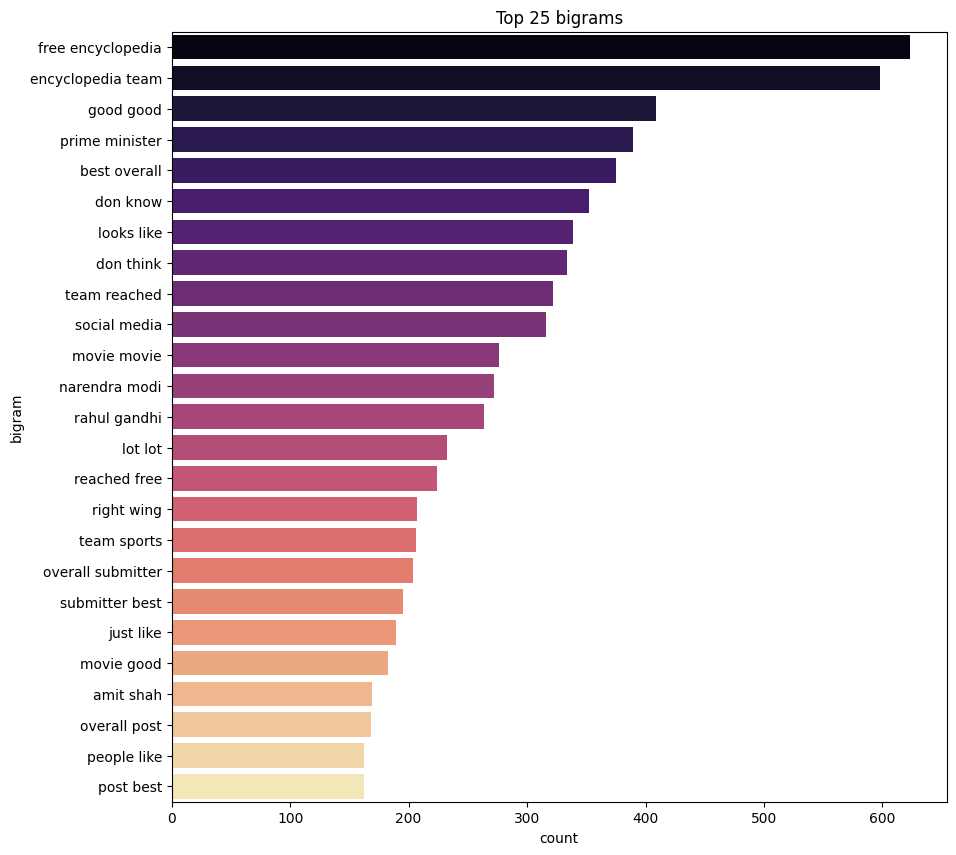

In [48]:
plt.figure(figsize=(10,10))
sns.barplot(data=top_25_bigrams_df,x='count',y='bigram', palette='magma')
plt.title("Top 25 bigrams")
plt.show()

/tmp/ipython-input-1535243878.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df,x='count',y='trigram', palette='magma')


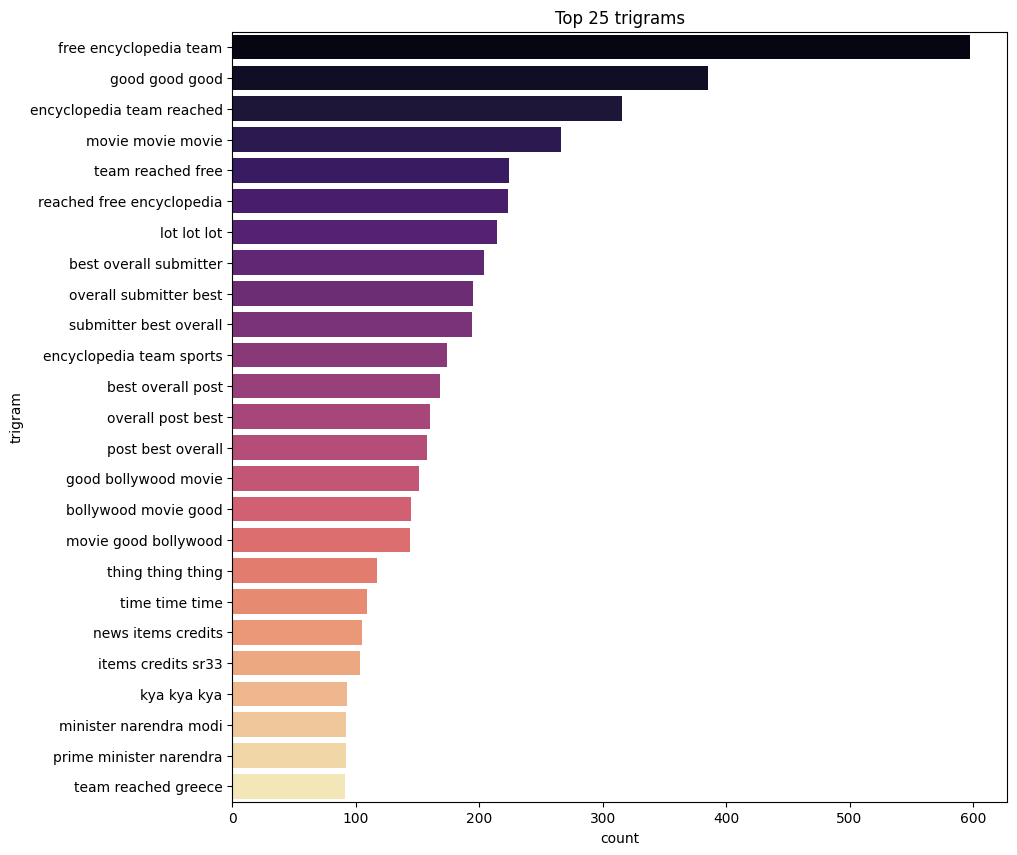

In [50]:
def get_top_25_trigrams(corpus,n=None):
  vec=CountVectorizer(ngram_range=(3,3),stop_words="english").fit(corpus)
  bag_of_words=vec.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)
  return words_freq[:n]

top_25_trigrams = get_top_25_trigrams(df['clean_comment'],25)

# convert DF
top_25_trigrams_df=pd.DataFrame(top_25_trigrams,columns=['trigram','count'])

plt.figure(figsize=(10,10))
sns.barplot(data=top_25_trigrams_df,x='count',y='trigram', palette='magma')
plt.title("Top 25 trigrams")
plt.show()

In [51]:
# remove all the no english characters
import re

df['clean_comment']=df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]','',str(x)))

In [52]:
all_text = " ".join(df['clean_comment'])

char_frequency = Counter(all_text)

char_frequency_df = pd.DataFrame(char_frequency.items(),columns=['char','count']).sort_values(by='count',ascending=False)

char_frequency_df.head()

,char,count
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388


In [55]:
char_frequency_df

,char,count
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [57]:
stop_words= set(stopwords.words('english'))-{'not','but','however','no','yet'}

df['clean_comment']=df['clean_comment'].apply(lambda x: ' '.join([words for words in x.split() if words not in stop_words]))

In [68]:
df['clean_comment'].head(1)

,clean_comment
0,family mormon never tried explain still stare ...


In [70]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuations
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [71]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer=WordNetLemmatizer()

df['clean_comment']=df['clean_comment'].apply(lambda x: ' '.join([lemmatizer.lemmatize(words) for words in x.split()]))

df['clean_comment'].head(1).values


[nltk_data] Downloading package wordnet to /root/nltk_data...


array(['family mormon never tried explain still stare puzzled time time like kind strange creature nonetheless come admire patience calmness equanimity acceptance compassion developed thing buddhism teach'],
      dtype=object)

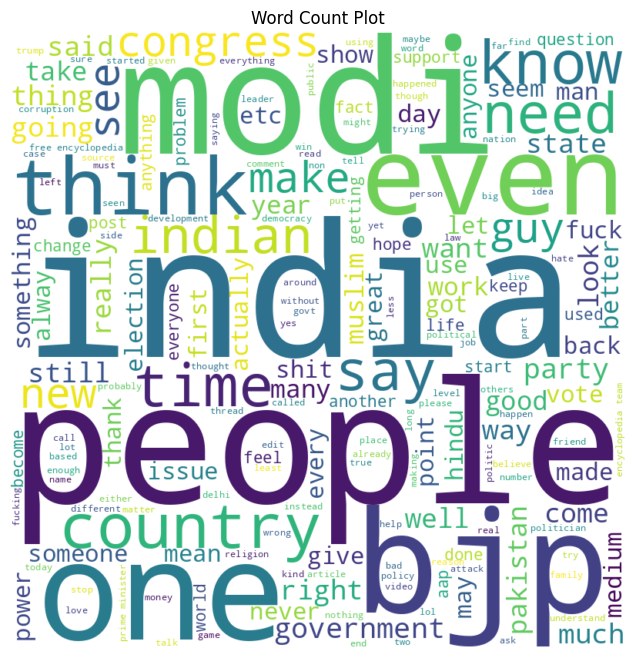

In [74]:
from wordcloud import WordCloud
def plot_word_cloud(text,title=None):
  wordcloud=WordCloud(width=800,height=800,background_color='white').generate(' '.join(text))
  plt.figure(figsize=(8,8))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')
  if title:
    plt.title(title)

  plt.show()

plot_word_cloud(df['clean_comment'],"Word Count Plot")

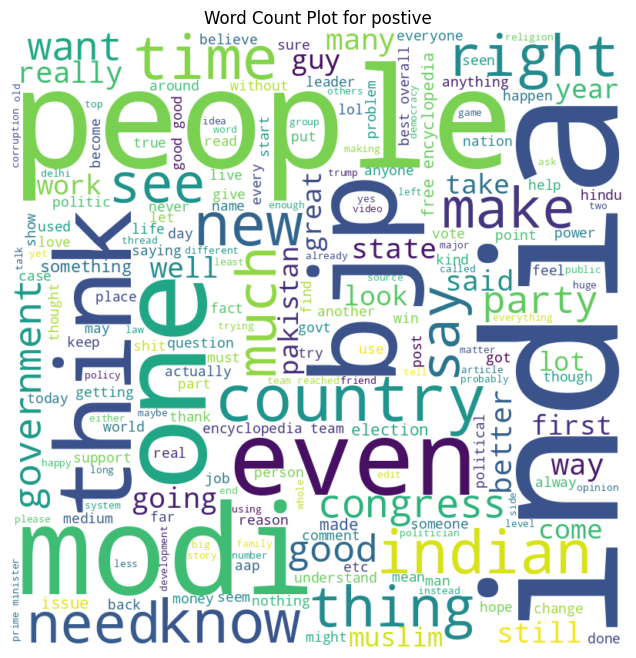

In [75]:
plot_word_cloud(df[df['category']==1]['clean_comment'],"Word Count Plot for postive")

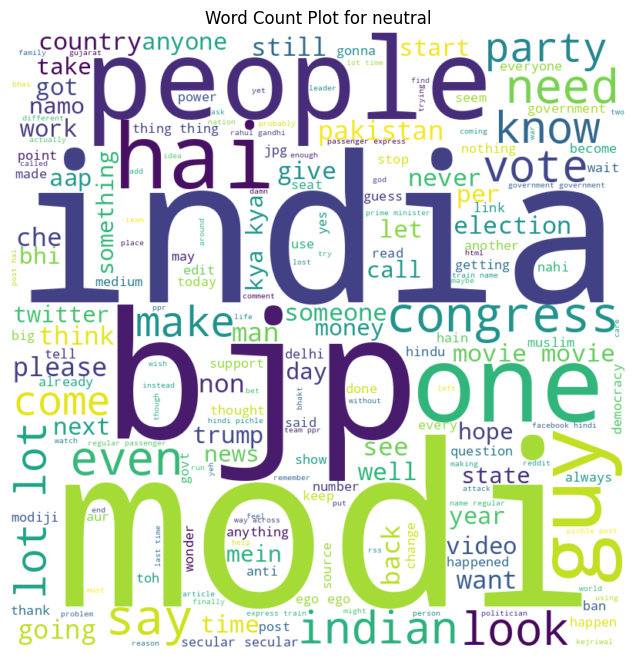

In [76]:
plot_word_cloud(df[df['category']==0]['clean_comment'],"Word Count Plot for neutral")


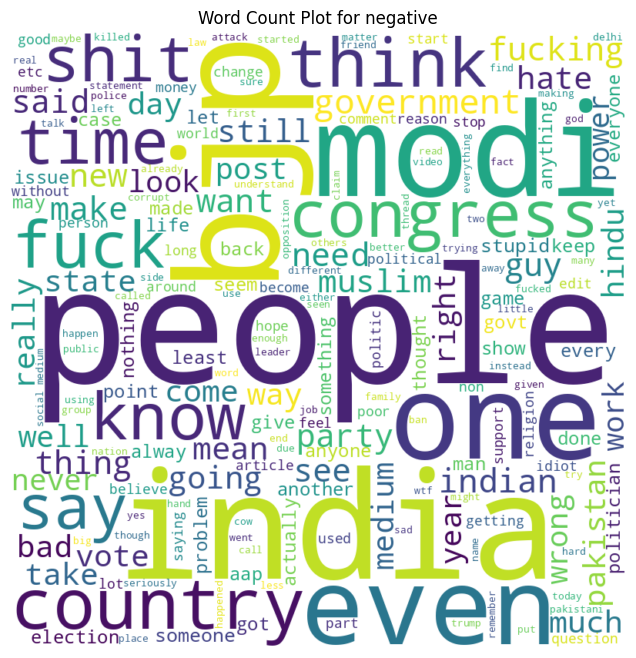

In [77]:
plot_word_cloud(df[df['category']==-1]['clean_comment'],"Word Count Plot for negative")
